# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric" 
api_keys = weather_api_key
appid = api_keys
settings = {"units": "metric", "appid": api_keys}
city_url = f"{url}appid={api_keys}&units={units}&q="
respond = requests.get (city_url+ "London").json()
print (respond)
display(respond)


{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.1, 'feels_like': 12.4, 'temp_min': 10.99, 'temp_max': 14.34, 'pressure': 1012, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 2.62, 'deg': 339, 'gust': 6.69}, 'clouds': {'all': 72}, 'dt': 1689909944, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1689912469, 'sunset': 1689969935}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 13.1,
  'feels_like': 12.4,
  'temp_min': 10.99,
  'temp_max': 14.34,
  'pressure': 1012,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 2.62, 'deg': 339, 'gust': 6.69},
 'clouds': {'all': 72},
 'dt': 1689909944,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1689912469,
  'sunset': 1689969935},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [4]:
#try:
        # # Parse the JSON and retrieve data
        # city_weather = # YOUR CODE HERE
        

        # # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # city_lat = city_weather ["coord"]["lat"]
        # city_lng = city_weather ["coord"]["lon"]
        # city_max_temp = city_weather ["main"]["temp_max"]
        # city_humidity = city_weather ["main"]["humidity"]
        # city_clouds = city_weather ["clouds"]["all"]
        # city_wind = city_weather ["wind"]["speed"]
        # city_country = city_weather ["sys"]["country"]
        # city_date = city_weather ["dt"]

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric" 
api_keys = weather_api_key
appid = api_keys
settings = {"units": "metric", "appid": api_keys}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    c='london'
    # Create endpoint URL with each city
    city_url = f"{url}appid={api_keys}&units={units}&q={city}"
#print (city_url)   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get (city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | fort bragg


Processing Record 3 of Set 1 | merizo village
Processing Record 4 of Set 1 | lukolela
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | petropavlovsk-kamchatsky
Processing Record 7 of Set 1 | valdivia
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | egilsstadir
Processing Record 13 of Set 1 | badger
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | zeya
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | bandarbeyla
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | vorgashor
Processing Record 22 of Set 1 | chibougamau
Processing Record 23 of Set 1 | albany
Processing Record 24 of Set 1 | alghero
Processing Record 25 of Set 1 | stanley
Processing Rec

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,-1.19,80,75,3.09,AR,1689910264
1,fort bragg,35.1390,-79.0060,26.78,83,99,1.34,US,1689909994
2,merizo village,13.2658,144.6691,32.31,81,39,4.73,GU,1689910264
3,lukolela,-1.0605,17.1821,22.43,67,54,1.47,CD,1689910264
4,hithadhoo,-0.6000,73.0833,28.70,73,68,7.18,MV,1689910265


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,-1.19,80,75,3.09,AR,1689910264
1,fort bragg,35.1390,-79.0060,26.78,83,99,1.34,US,1689909994
2,merizo village,13.2658,144.6691,32.31,81,39,4.73,GU,1689910264
3,lukolela,-1.0605,17.1821,22.43,67,54,1.47,CD,1689910264
4,hithadhoo,-0.6000,73.0833,28.70,73,68,7.18,MV,1689910265


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

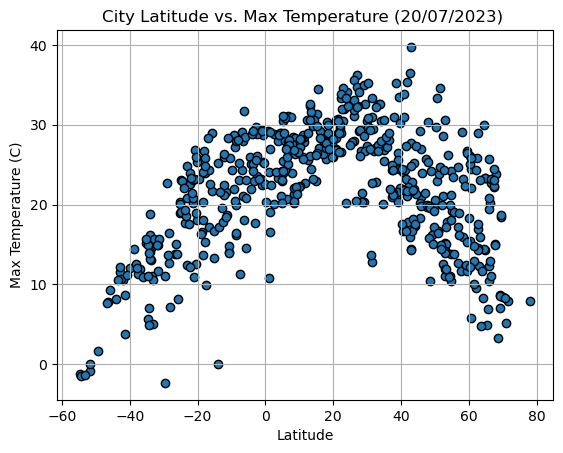

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (%s) " % time.strftime("%d/%m/%Y"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

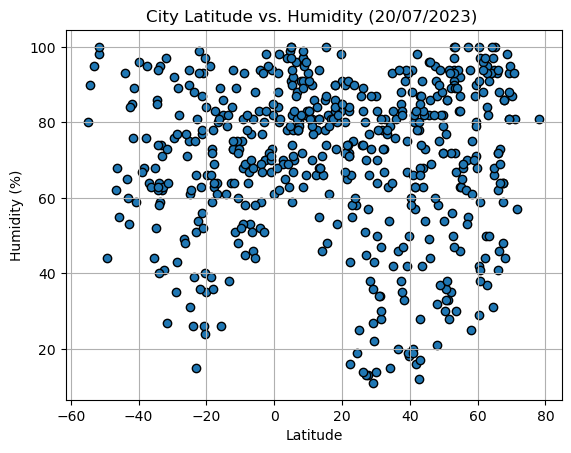

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (%s) " % time.strftime("%d/%m/%Y"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

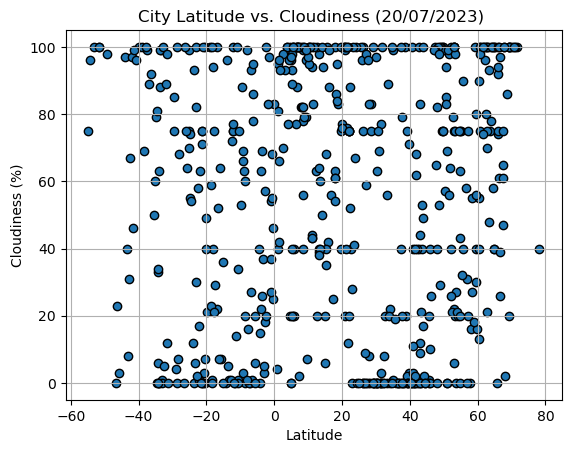

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (%s) " % time.strftime("%d/%m/%Y"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

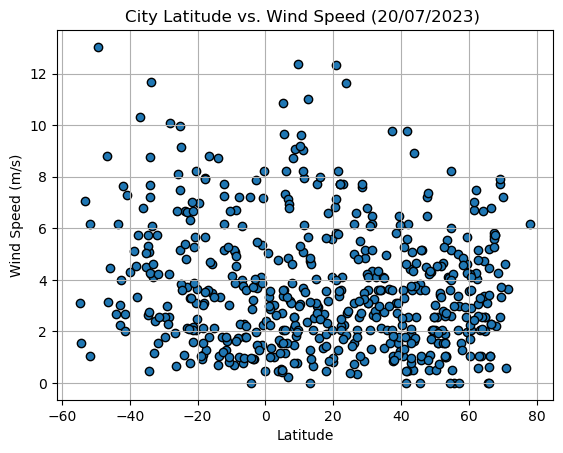

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (%s) " % time.strftime("%d/%m/%Y"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# # Define a function to create Linear Regression plots
# # YOUR CODE HERE
# def plot_linear_regression(x_values, y_values):
    
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     plt.scatter(x_values, y_values)
#     plt.plot (x_values,regress_values,'r-')
#     plot.show()
#     return line_eq

In [38]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot (x_values,regress_values,'r-')
    plt.show()
    return line_eq
    

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fort bragg,35.1390,-79.0060,26.78,83,99,1.34,US,1689909994
2,merizo village,13.2658,144.6691,32.31,81,39,4.73,GU,1689910264
5,petropavlovsk-kamchatsky,53.0452,158.6483,14.33,100,75,1.00,RU,1689910265
7,tiksi,71.6872,128.8694,7.95,57,100,3.65,RU,1689910265
10,kodiak,57.7900,-152.4072,11.73,94,0,1.54,US,1689910266


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,-1.19,80,75,3.09,AR,1689910264
3,lukolela,-1.0605,17.1821,22.43,67,54,1.47,CD,1689910264
4,hithadhoo,-0.6000,73.0833,28.70,73,68,7.18,MV,1689910265
6,valdivia,-39.8142,-73.2459,12.05,96,100,4.29,CL,1689910265
8,adamstown,-25.0660,-130.1015,20.37,90,99,9.99,PN,1689910265


###  Temperature vs. Latitude Linear Regression Plot

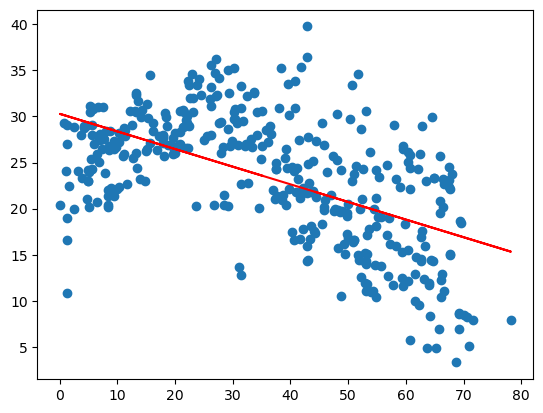

'y = -0.19x + 30.28'

In [41]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,-10))

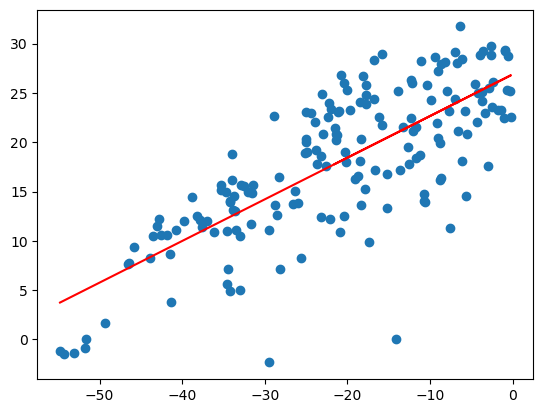

'y = 0.42x + 26.89'

In [42]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,30))

**Discussion about the linear relationship:**  In the northern hemisphere it is incidated that nearer the equator (Latitude = 0) the max temp is higher. The southern hemisphere has the same outcome. R-values are 0.741 and 0.48

### Humidity vs. Latitude Linear Regression Plot

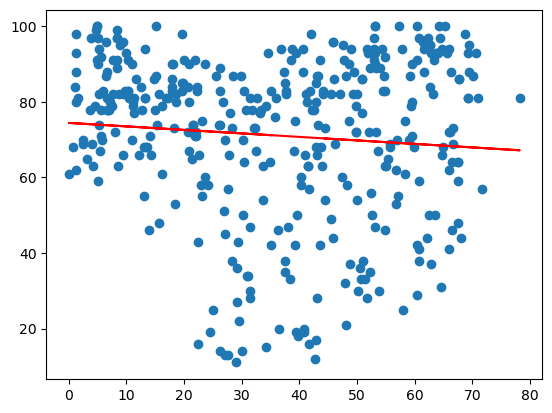

'y = -0.09x + 74.47'

In [43]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(45,20))

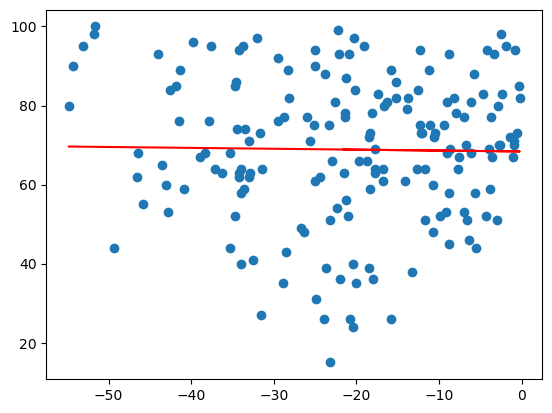

'y = -0.02x + 68.39'

In [44]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-50,20))

**Discussion about the linear relationship:** In the northern hemisphere the humidity trend appears reasonably consistent with a very slight increase at the north most point. This appears similiar for the southern hemisphere plot where the humidty increases marginallyYOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

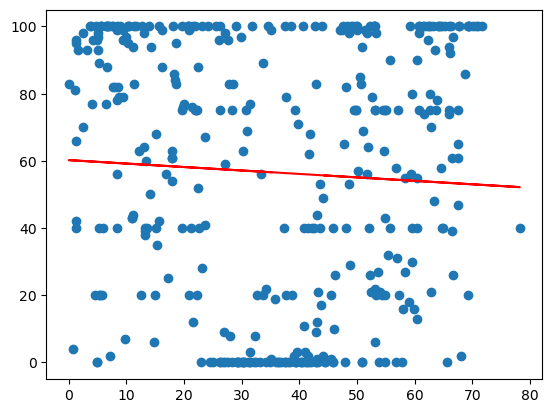

'y = -0.1x + 60.23'

In [45]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(45,20))

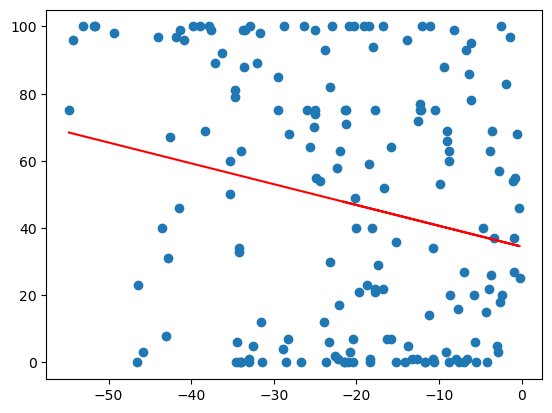

'y = -0.62x + 34.48'

In [46]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-50,20))

**Discussion about the linear relationship:** Looking at the northern hemisphere, there is minimal correlation between latitude and cloudines. Sothern hemisphere appears to have a higher relationship of cloudiness vs latitude.

### Wind Speed vs. Latitude Linear Regression Plot

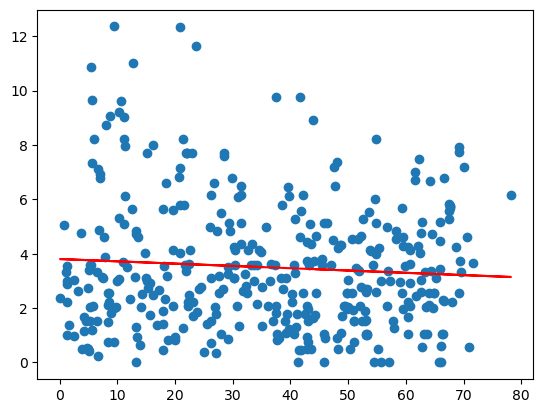

'y = -0.01x + 3.81'

In [47]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(10,12))

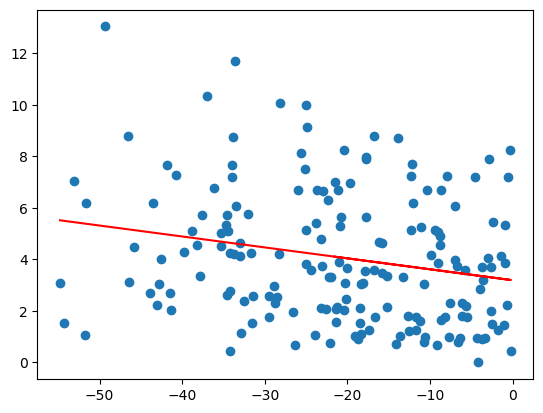

'y = -0.04x + 3.19'

In [48]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-55,9))

**Discussion about the linear relationship:** In the Northern Hemisphere, there appears to be no relationship occurring between wind speed & latitude with the r-value being 0.009. The Southern Hemisphere statistics show marginal relationship as it moves away from the equator, with an r-value at 0.159